['results/continuous/tests/agentRL0.npy', 'results/continuous/tests/agentRL1.npy', 'results/continuous/tests/agentRL2.npy', 'results/continuous/tests/agentRL3.npy', 'results/continuous/tests/agentRL4.npy', 'results/continuous/tests/agentRL5.npy', 'results/continuous/tests/agentRL6.npy', 'results/continuous/tests/agentRL7.npy', 'results/continuous/tests/agentRL8.npy', 'results/continuous/tests/agentRL9.npy']
Using agent: 0 results/continuous/tests/agentRL0.npy


AttributeError: 'KMeans' object has no attribute 'save'

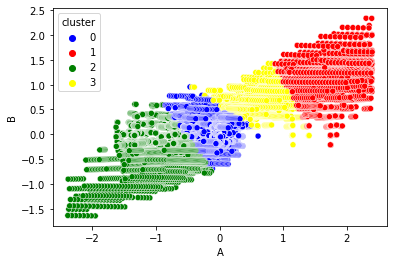

In [11]:
import seaborn as sns
from sklearn.cluster import KMeans
from agent.ContinuousAgent import CartPoleAgentCont
from util.Agent import select_agent
import pickle

resultsFolder = 'results/continuous/tests/'
agent = CartPoleAgentCont()
teacherAgent, number, teacherPath = select_agent(agent, resultsFolder, 10)
print('Using agent:', number, teacherPath)


with open(resultsFolder + 'agentRL3.npy_gmodelstate', "rb") as f:
    states = pickle.load(f)


teacherAgent.generalise_model = KMeans(n_clusters=4, n_init=10)
teacherAgent.generalise_model.fit(states)
label = teacherAgent.generalise_model.predict(states)
df = {}
df['A'] = [x[0] for x in states]
df['B'] = [x[1] for x in states]
df['cluster'] = label
dic = {0:"Blue", 1:"Red", 2:"Green", 3:"Yellow"}
sns.scatterplot(x="A", y="B", data=df, hue="cluster", palette = dic)
teacherAgent.save(resultsFolder + 'agentRL0.npy')
